# Notebook Imports

In [218]:
from sklearn.datasets import load_boston

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm #some statistics like p-value
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

import boston_valuation as val # I created this module

import warnings
warnings.filterwarnings('ignore')

# Gather Data

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils._bunch.Bunch

In [4]:
 boston_dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
#returns list of the attributes and methods of any object
dir(boston_dataset)

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data points and features

In [7]:
boston_dataset.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [8]:
type(boston_dataset.data)

numpy.ndarray

In [9]:
boston_dataset.data.shape

(506, 13)

In [10]:
boston_dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [11]:
#Actual prices in thousands(000)
boston_dataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Expolration with pandas dataframe

In [12]:
#Create pandas dataframe
data = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

# Add columns with the price (target)
data['PRICE']=boston_dataset.target

In [13]:
data.head(2)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6

In [14]:
data.tail(2)

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [15]:
data.count() # show the number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## Cleaning data- check for missing values

In [16]:
pd.isnull(data)
#data.isnull()

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  PRICE  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

In [17]:
#data.isnull().sum()
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualizing Data- Histogram, Distribution and Bar Charts

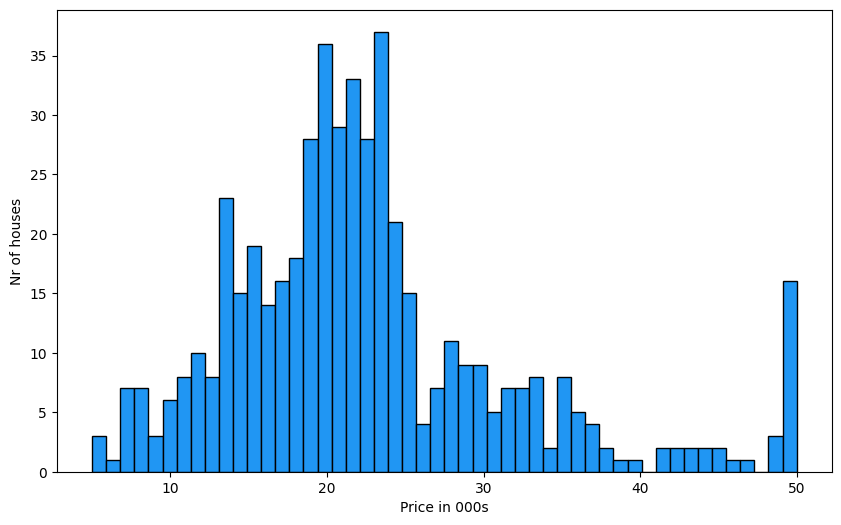

In [19]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=50, ec='black', color='#2096f3') #ec -> edge color 
plt.xlabel('Price in 000s')
plt.ylabel('Nr of houses')
plt.show()

<Figure size 1000x600 with 0 Axes>

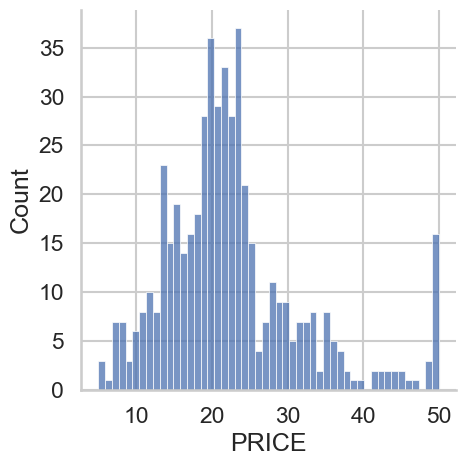

In [126]:
plt.figure(figsize=(10,6))
sns.displot(data['PRICE'],bins=50)
plt.show()

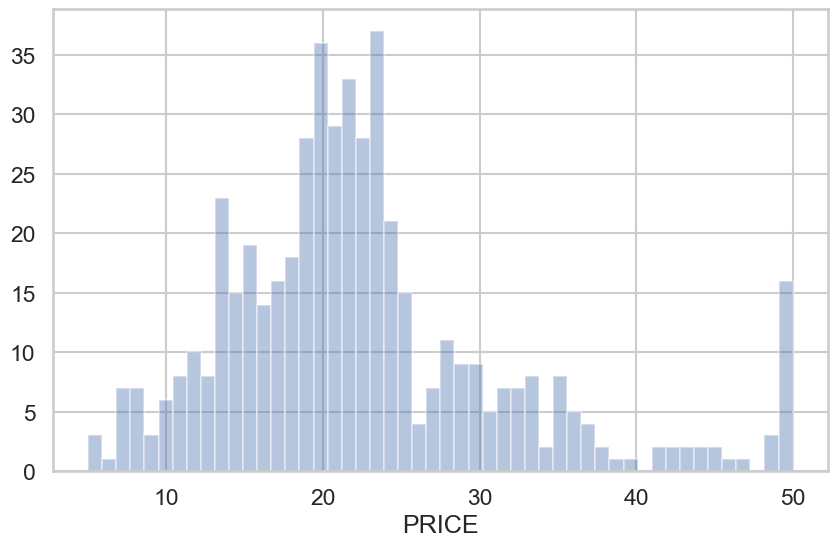

In [128]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'],bins=50,hist=True,kde=False)
plt.show()

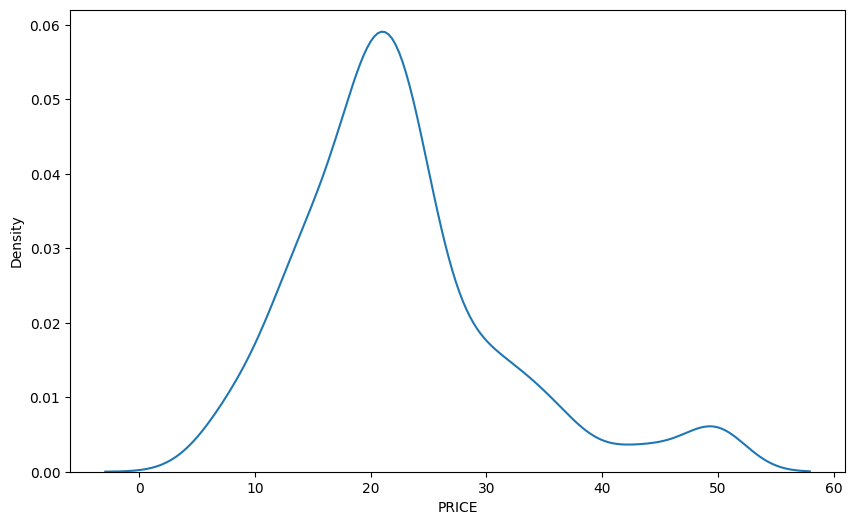

In [22]:
plt.figure(figsize=(10,6))
sns.distplot(data['PRICE'],bins=50,hist=False,kde=True)
plt.show()

In [23]:
data['RM']

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

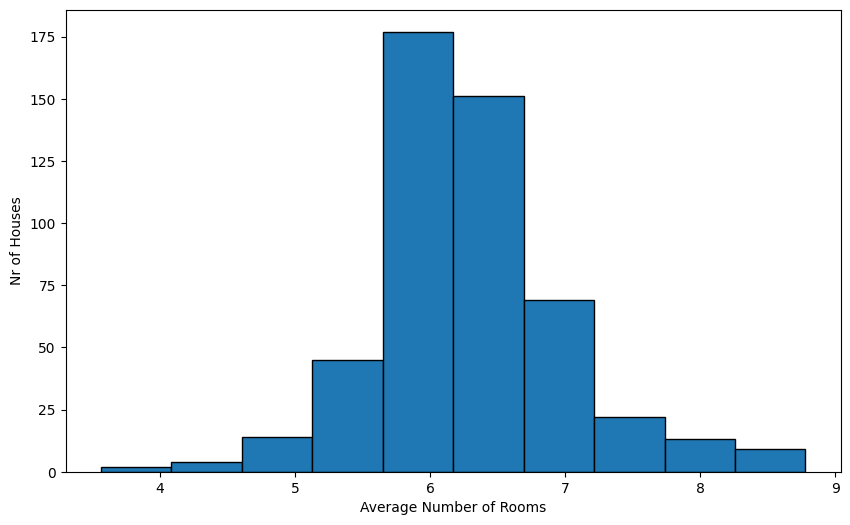

In [24]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec='black')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr of Houses')
plt.show()

<AxesSubplot: xlabel='RM', ylabel='Density'>

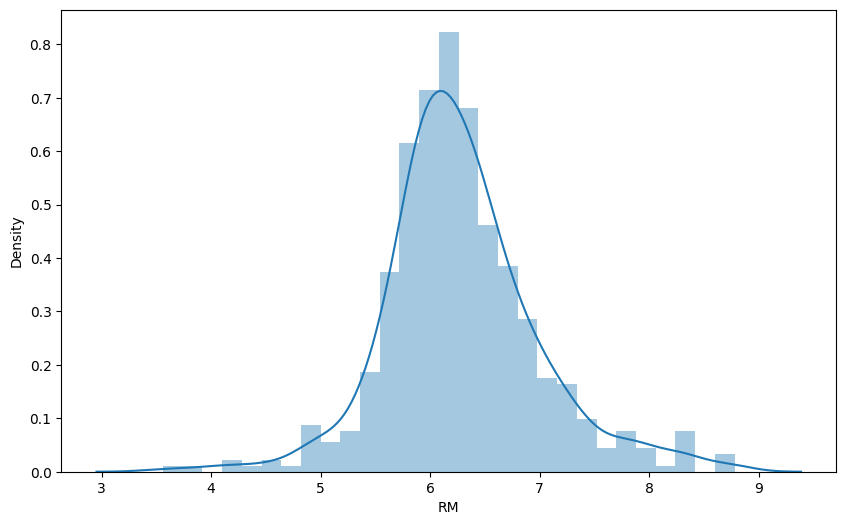

In [25]:
plt.figure(figsize=(10,6))
sns.distplot(data['RM'])

In [26]:
data['RM'].min()

3.561

In [27]:
round(data['RM'].max())

9

In [28]:
# Next Feature -> RAD 
# accessibility to the radial highways
set(data['RAD'])
#1- >low access  24-> high access

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24.0}

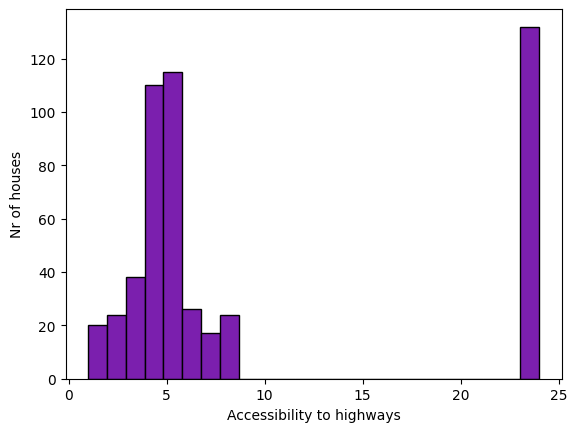

In [29]:
plt.hist(data['RAD'],bins=24,ec='black',color='#7b1fae') #24 -> high access
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr of houses')
plt.show()

In [30]:
#frequency.index

In [31]:
#frequency.axes[0]

In [32]:
frequency = data['RAD'].value_counts()
type(frequency)

pandas.core.series.Series

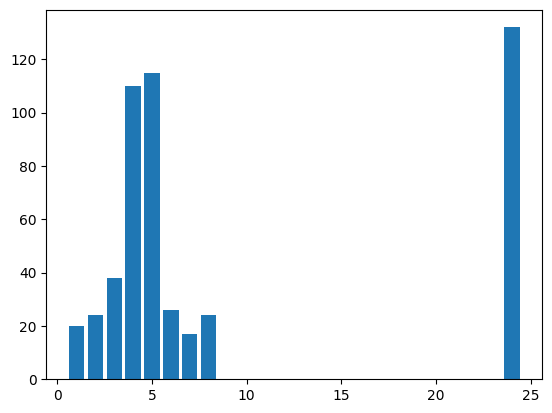

In [33]:
plt.bar(frequency.index, height=frequency)
plt.show()

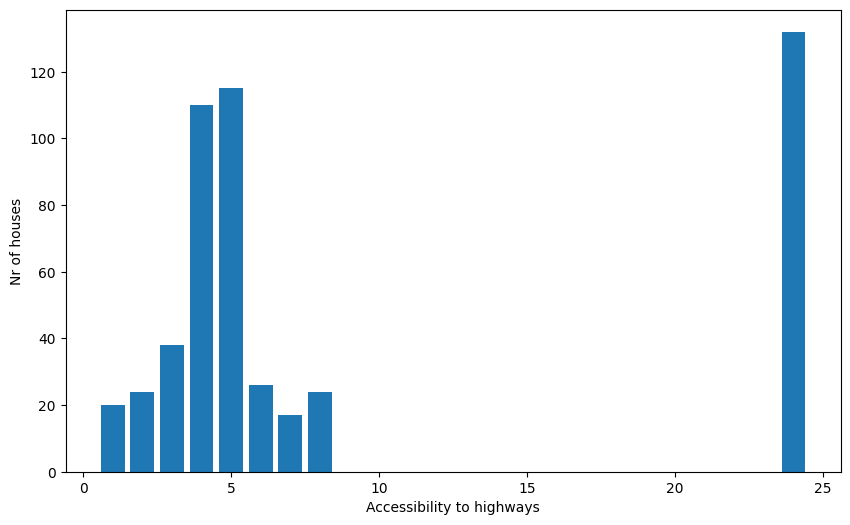

In [34]:
frequency = data['RAD'].value_counts()
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(10,6))
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr of houses')

plt.bar(frequency.index, height=frequency)

plt.show()

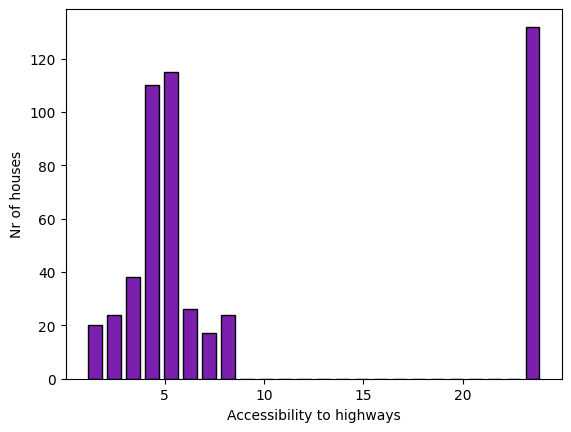

In [35]:
plt.hist(data['RAD'],bins=24,rwidth=0.7,ec='black',color='#7b1fae') #24 -> high access  #rwidth=0.7 ->space between hist
plt.xlabel('Accessibility to highways')
plt.ylabel('Nr of houses')
plt.show()



In [36]:
#charls river. dummy variable include 0,1 property is on the river or not
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [37]:
data['PRICE'].min()

5.0

In [38]:
data['PRICE'].max()

50.0

In [39]:
data['PRICE'].max()

50.0

In [40]:
#minum at every signle column in dataframe
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [41]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [42]:
#data.mean()
#data.median()

In [43]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation 

## $$ \rho _{XY} = corr(X,Y)$$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [44]:
#Number of rooms and the house price -> positive correlation
corr=data['PRICE'].corr(data['RM'])
print(corr) 

0.6953599470715389


In [45]:
# correlation betwwen the property price and the pupil-teacher ratio by town -> Negative correlation
#PTRATIO -> Measure the quality of the education/School -> reflect on the house price
#PTRATIO goes up is a bad things. so many pupils per class
corr=data['PRICE'].corr(data['PTRATIO'])
print(corr)

-0.5077866855375619


## Correlation of all features

In [46]:
data.corr() #pearson correlation coefficent
#strength
#Direction

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
PRICE   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     PRICE  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
PRICE    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

If two features perfectly correlated is a bad things or not -> it depends
e.g., weight and body fat
it could be a bad thing -> Multicollinearity
Multicollinearity -> two or more predictors in a regression are highly correlated to each other.
e.g., weight and body fat, these two not provide unique and independent information to the regression -> unreöiable finding


high correlation not necessairly mean Multicollinearity but we need to look at the correlation and see why?

In [47]:
#hide half of the table -> create an array and mask

In [48]:
#filter array
mask=np.zeros_like(data.corr()) # create zero arrays
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

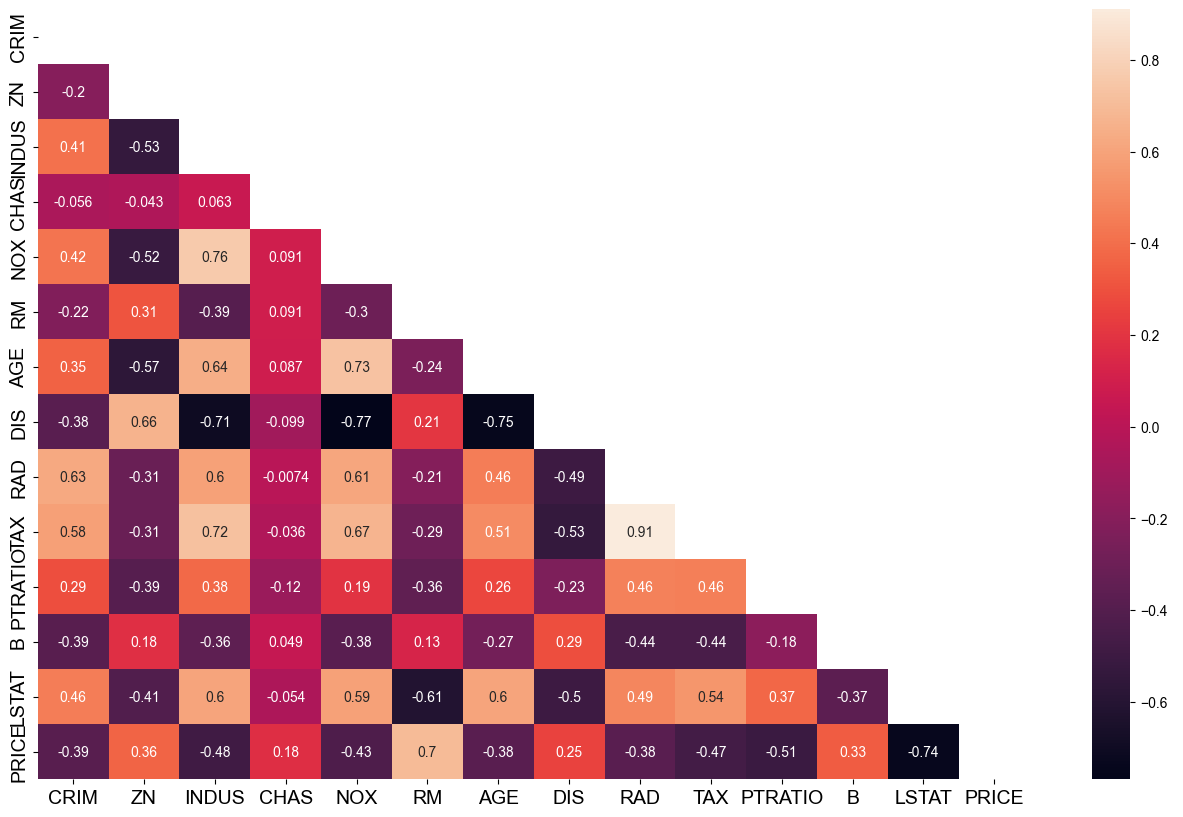

In [49]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True, annot_kws={'size':10}) #mask-> triangle_indices
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

what we can leaern from the corelation? we look at strenght and direction

pearson -> only valid for continies variable and not valid for dummy variable


scatter between DIS(measure of distance from employment center) and NOX(measure of pollution)

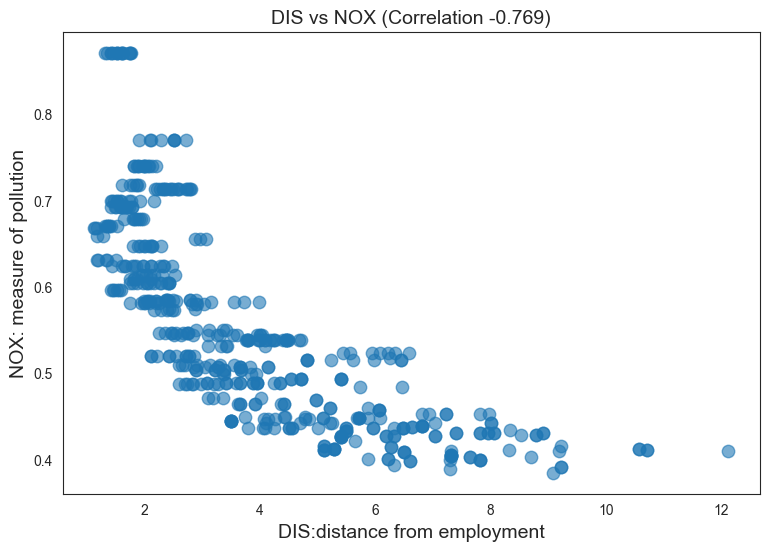

In [50]:
nox_dis_corr= round(data['DIS'].corr(data['NOX']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['DIS'], y=data['NOX'],alpha=0.6, s=80)

plt.title(f'DIS vs NOX (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('DIS:distance from employment',fontsize=14)
plt.ylabel('NOX: measure of pollution',fontsize=14)
plt.show()

## Plot with Seaborn

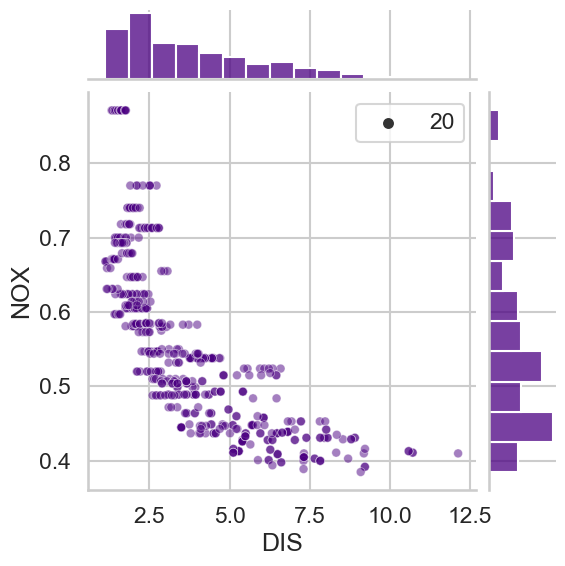

In [51]:
#jointplot is the function that ceate scatter plot
#The way to reset the styling for seaborn is with a function called "set".
sns.set() #reset the styling to the default styling
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['DIS'],y=data['NOX'],size=20,color='indigo',joint_kws={'alpha':0.5})# for transparency jointplot not get algha but rather  a dic
plt.show()

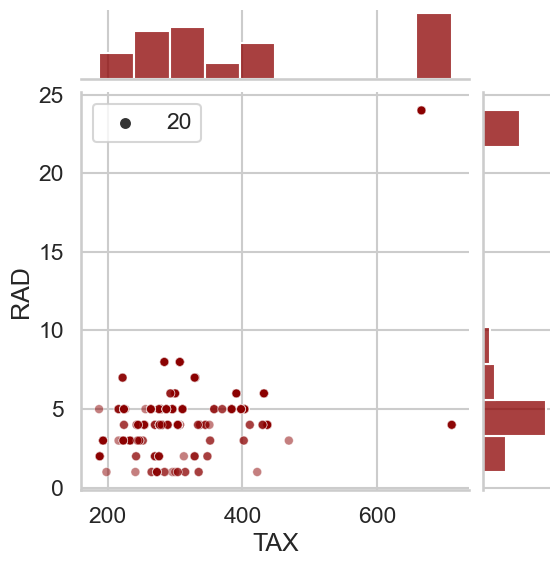

In [52]:
sns.set() #reset the styling to the default styling
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['TAX'],y=data['RAD'],size=20,color='darkred',joint_kws={'alpha':0.5})# for transparency jointplot not get algha but rather  a dic
plt.show()

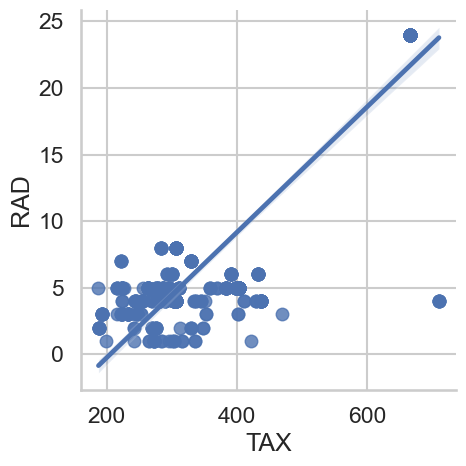

In [53]:
#plot linear regression between our two features
#plot best fit lined Plot data and regression model fits across a FacetGrid.
sns.lmplot(x='TAX',y='RAD',data=data)
plt.show()


# the outlier on top rigt affect the slope of regression effectively

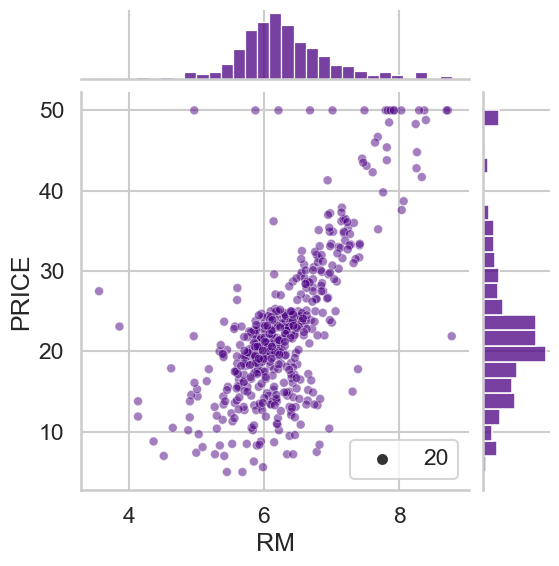

In [54]:
#challenge 1 scatter bewteen Nr rooms and the house price
sns.set() 
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=data['RM'],y=data['PRICE'],size=20,color='indigo',joint_kws={'alpha':0.5})# for transparency jointplot not get algha but rather  a dic
plt.show()

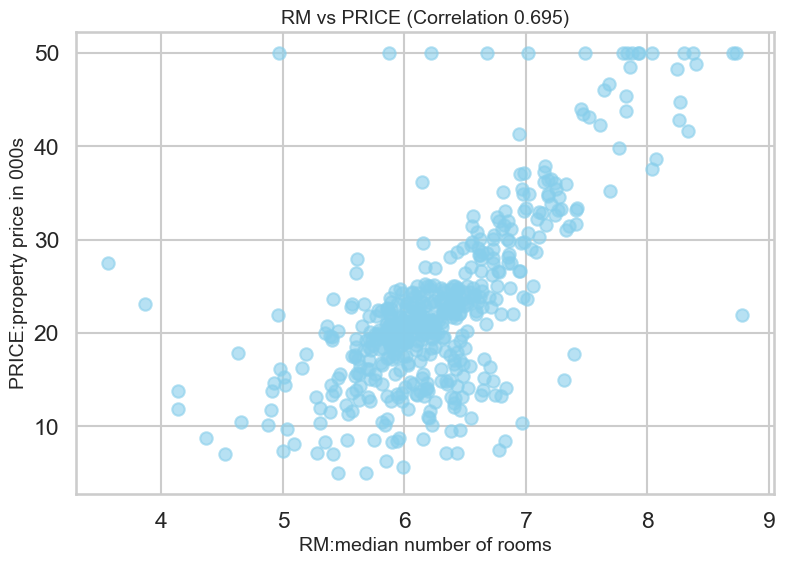

In [55]:
rm_tgt_corr= round(data['RM'].corr(data['PRICE']), 3)

plt.figure(figsize=(9,6))
plt.scatter(x=data['RM'], y=data['PRICE'],alpha=0.6, s=80,color='skyblue')

plt.title(f'RM vs PRICE (Correlation {rm_tgt_corr})', fontsize=14)
plt.xlabel('RM:median number of rooms',fontsize=14)
plt.ylabel('PRICE:property price in 000s',fontsize=14)
plt.show()

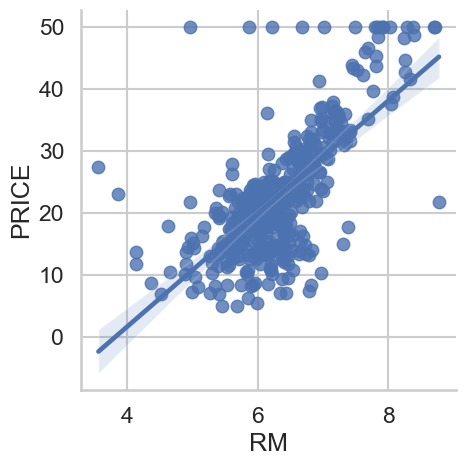

In [56]:
sns.lmplot(x='RM',y='PRICE',data=data)
plt.show()

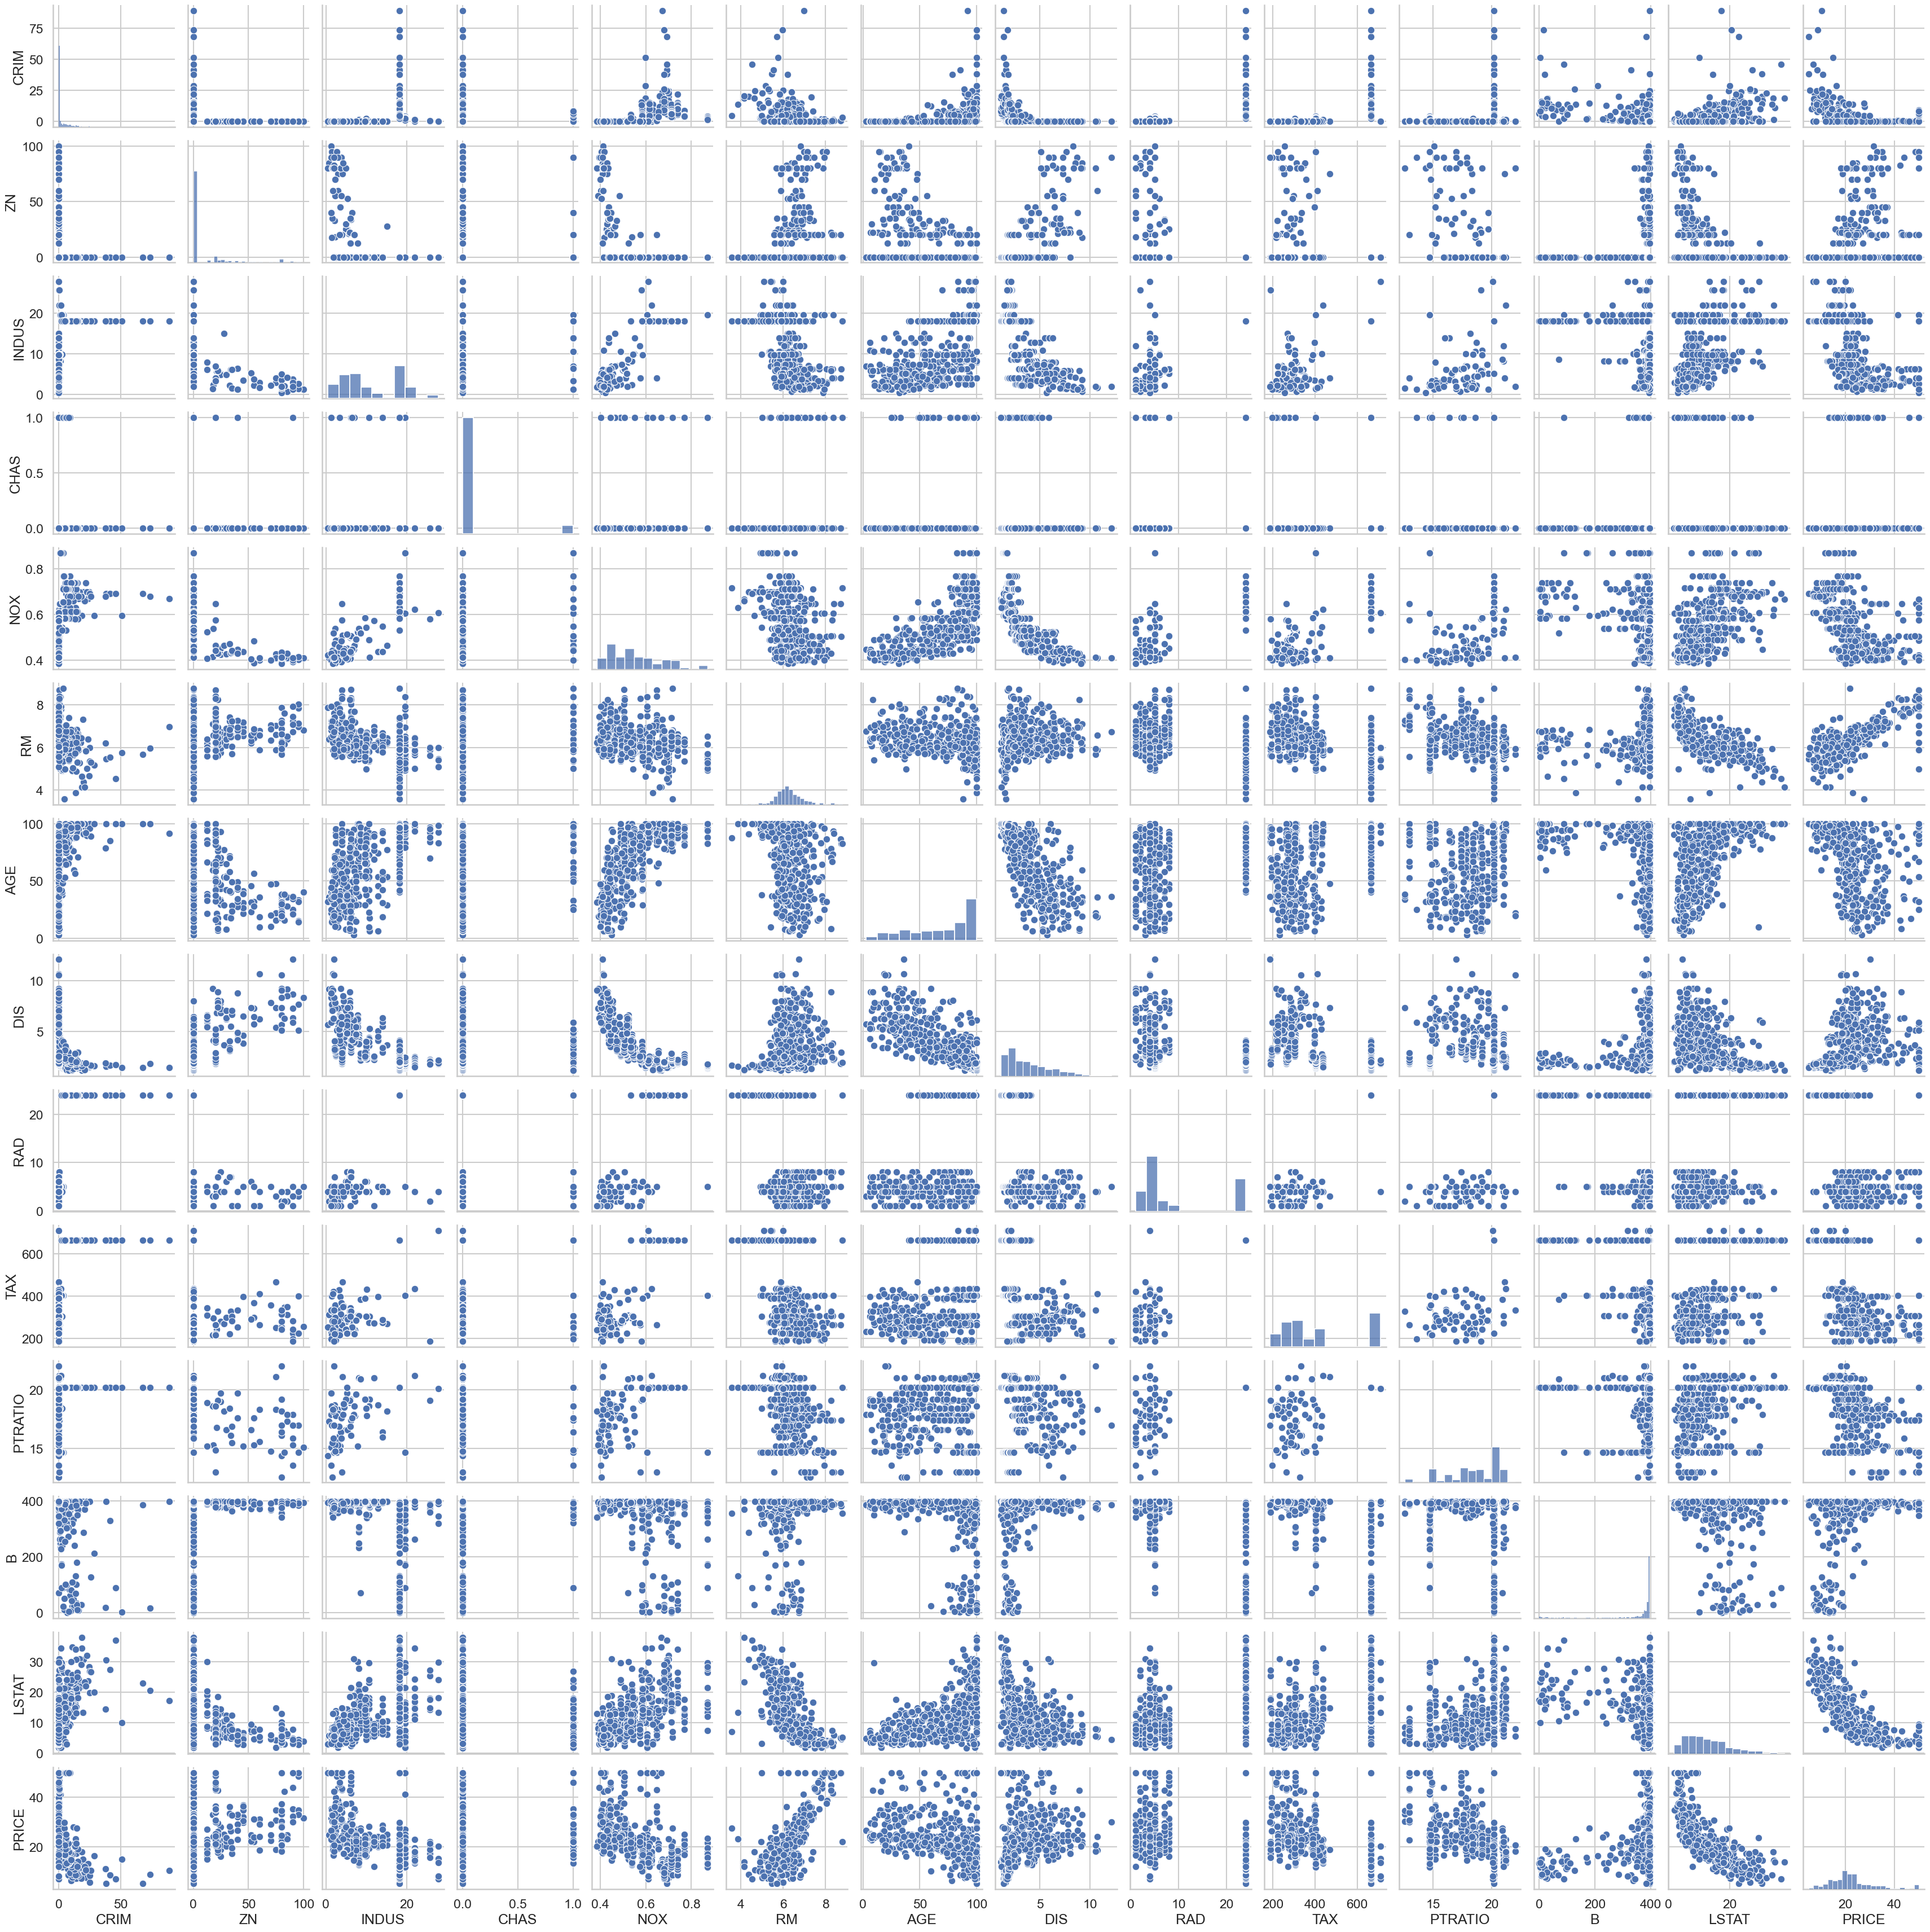

CPU times: total: 1min 44s
Wall time: 1min 44s


In [57]:
%%time

#plot scatter between all og our features and the target


sns.pairplot(data)
plt.show()

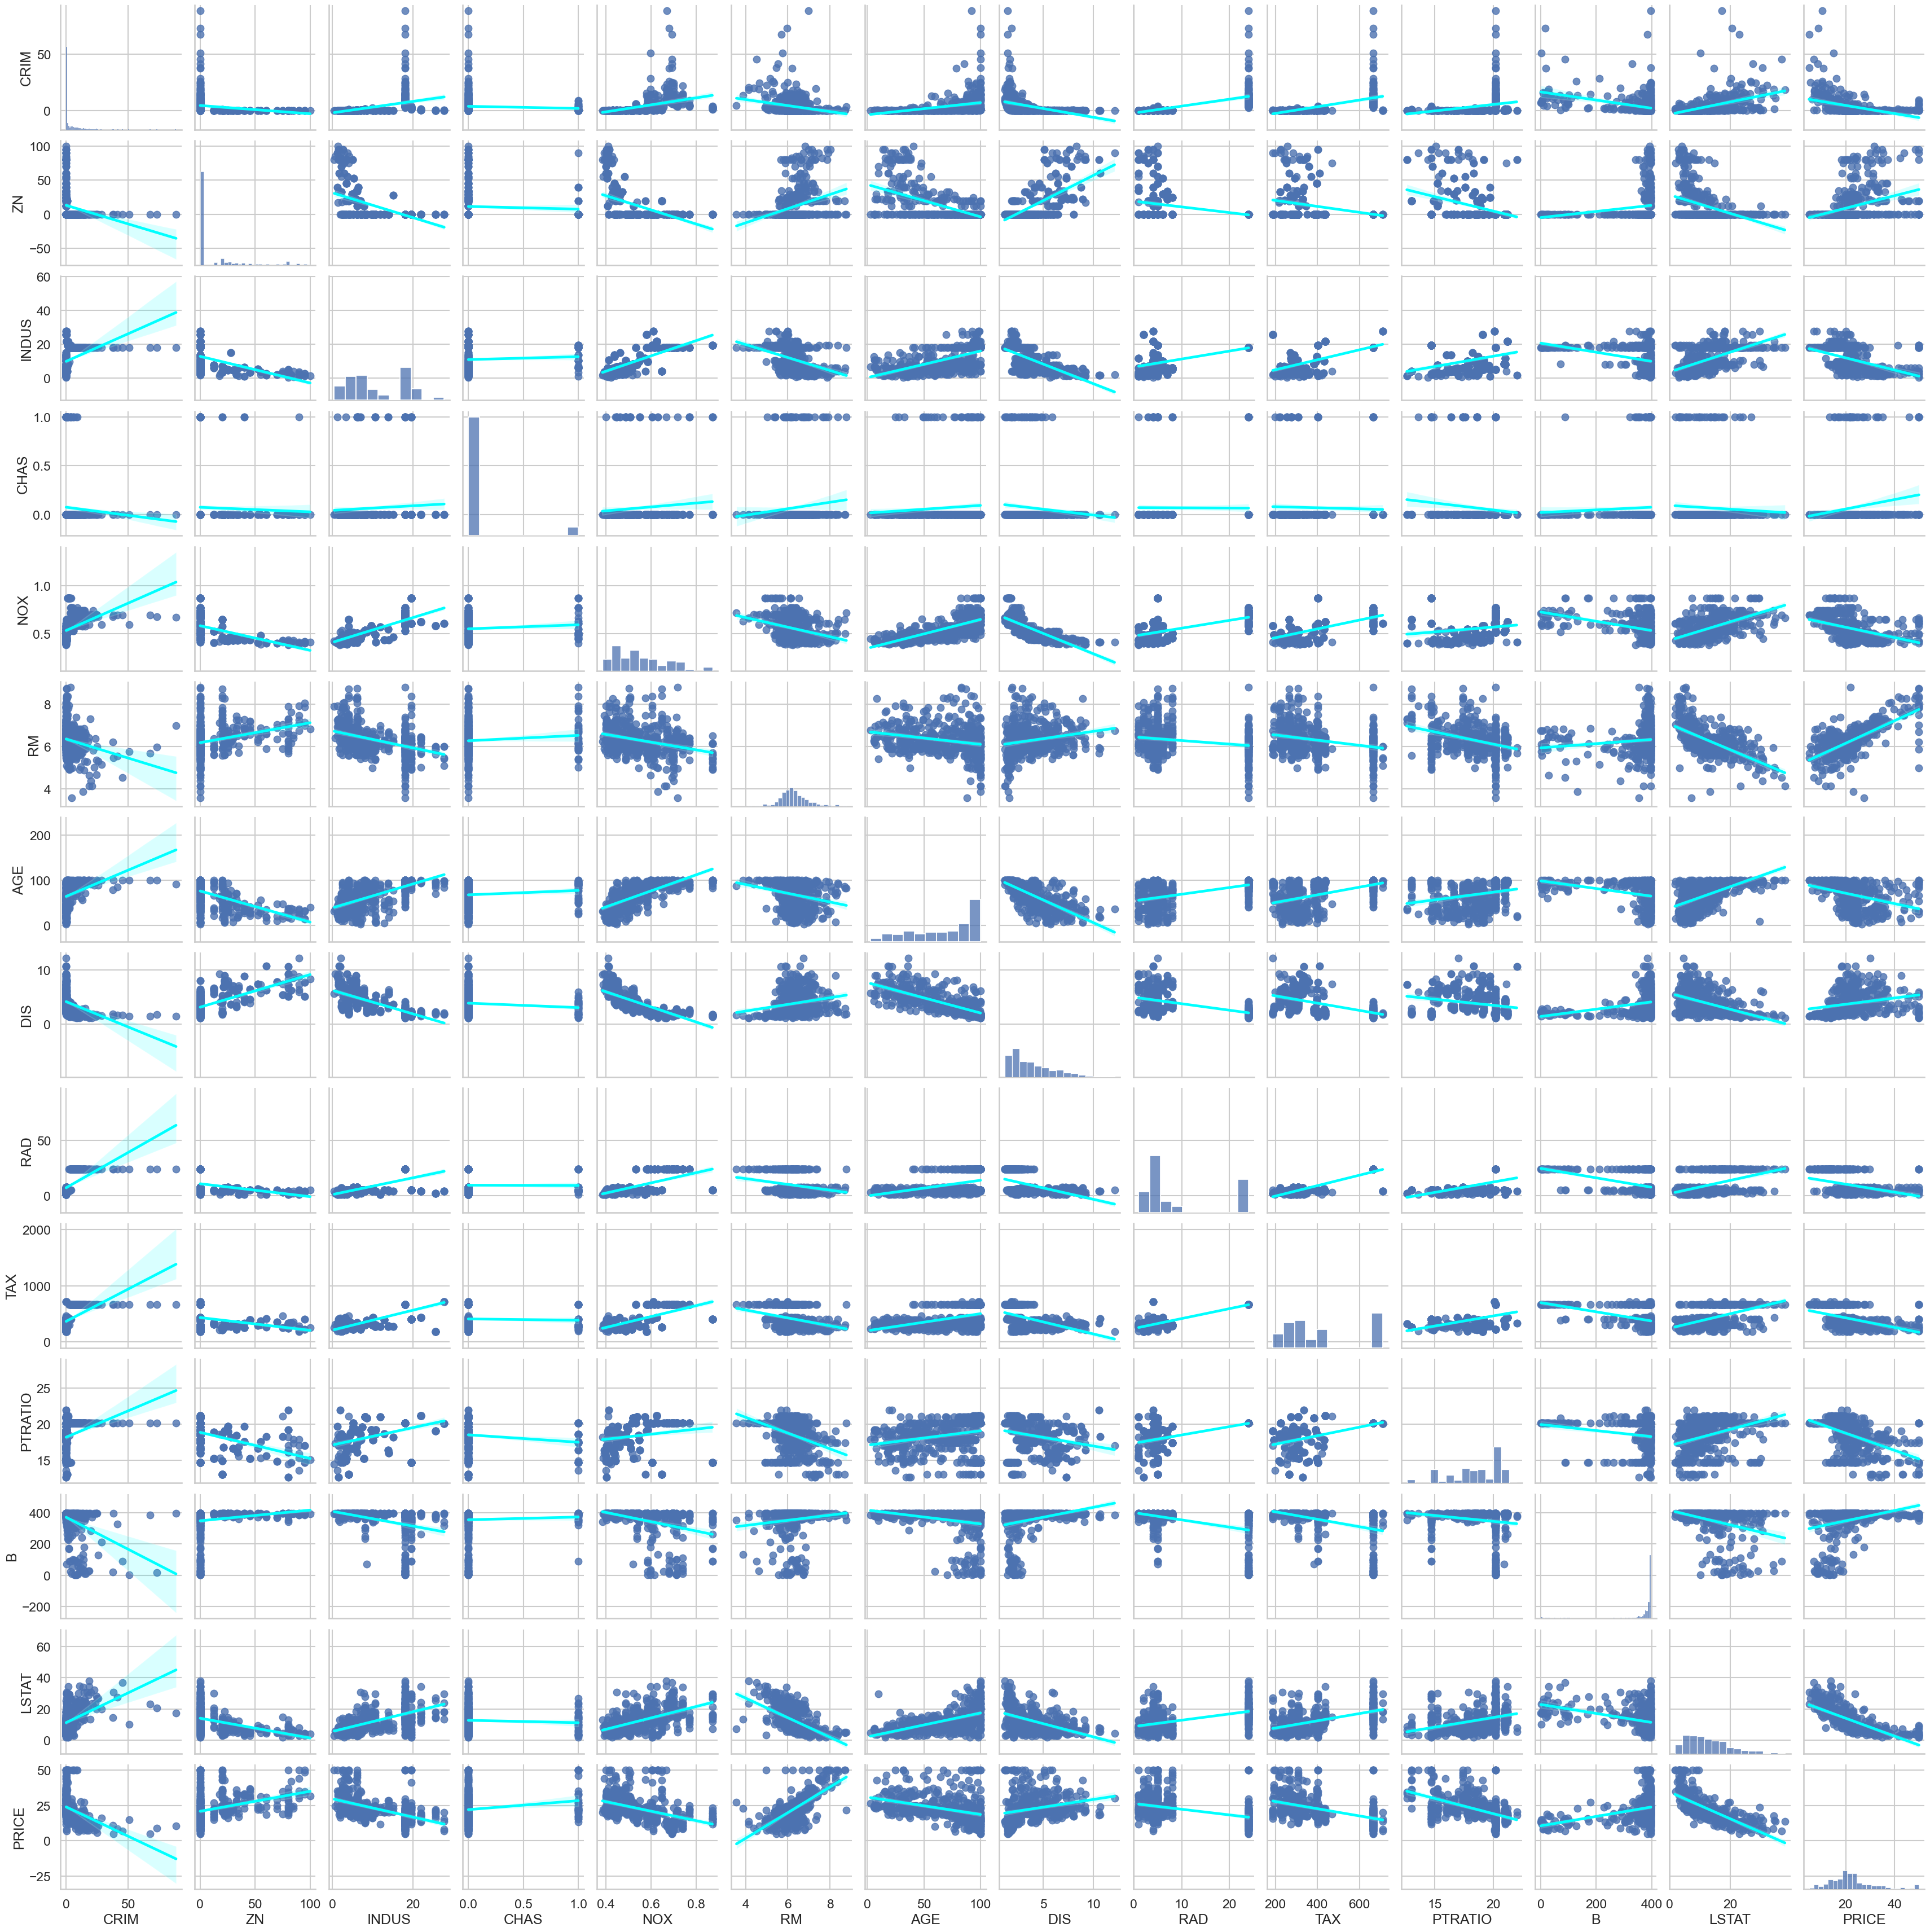

CPU times: total: 2min 34s
Wall time: 2min 34s


In [58]:
%%time 

sns.pairplot(data, kind ='reg', plot_kws={'line_kws':{'color':'cyan'}}) #nested dict
plt.show()

## Training & Test Dateset Split

In [70]:
prices = data['PRICE']
features = data.drop('PRICE',axis=1)

In [85]:
X_train, X_test,y_train,y_test=train_test_split(features, prices, test_size=0.2, random_state=10)

In [86]:
# %of training data
len(X_train)/len(features)

0.7984189723320159

In [87]:
# %of test data
X_test.shape[0]/features.shape[0]

0.2015810276679842

## Multivariable Regression

In [88]:
regr=LinearRegression() #create regression object

In [91]:
regr.fit(X_train, y_train) #give the training data to the data

LinearRegression()

In [ ]:
#using our training data, we estimated all of these values

## Model Evaluation

### R-squared
### p-values
### V.I.F. -> variance inflation factor
### BIC -> Bayesian information criteria

#### How to evaluste the regression model

## R-squared

In [ ]:
#challenge: print out r-squared for training and test data

In [99]:
print('Trianing data r-squared:', regr.score(X_train,y_train))
#Approximetly 75 percent of thr variance in house price can explained by these 13 features

Trianing data r-squared: 0.750121534530608


In [100]:
print('Test data r-squared:', regr.score(X_test,y_test))

Test data r-squared: 0.6709339839115627


In [101]:
#calculate all these parameters
#intercept
print('Intercept',regr.intercept_)
#print out the values of all coef
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Intercept 36.533051382824254


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

In [ ]:
#why the r-sqaured is lower in the test data set? because the algorithm does not seen the test data before
#however the r-squared even on the test data is still quite high.

## Data Transformation

In [103]:
data['PRICE'].skew()

1.1080984082549072

In [ ]:
#I want to do something that will affect our large house prices in the tail more than the rest.

In [ ]:
# log transformation

In [ ]:
# how do we apply a log transformation to our target values? 
# two ways_
# 1) from math import log -> (however hard to apply on the entire dataset)   2) we can have access through numpy

In [107]:
# transform the entire series into log prices
y_log=np.log(data['PRICE'])
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: PRICE, dtype: float64

In [108]:
y_log.skew()
# we are much closer to the zero than skew 1.1

-0.33032129530987864

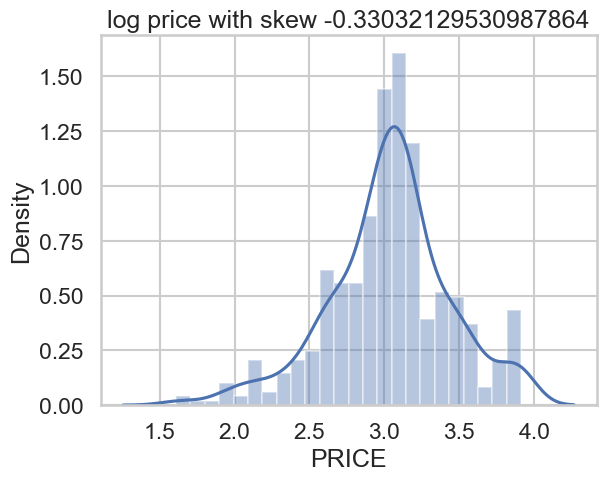

In [110]:
sns.distplot(y_log)
plt.title(f'log price with skew {y_log.skew()}')
plt.show()

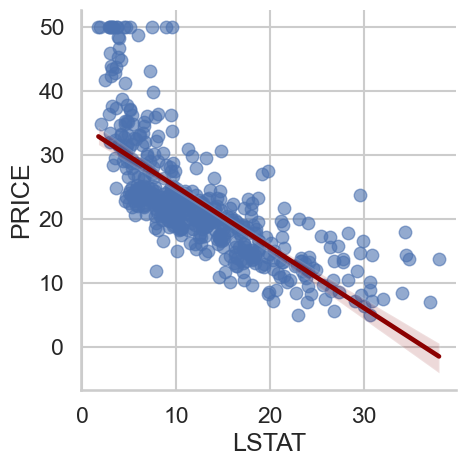

In [115]:
# lmplot -> gives us scatter plot with regression line
# LSTAT feature check data info
sns.lmplot(x='LSTAT', y='PRICE', data=data, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

In [ ]:
# we can see that the relationship between LSTAT and price might not be a linear one. how about log prices=

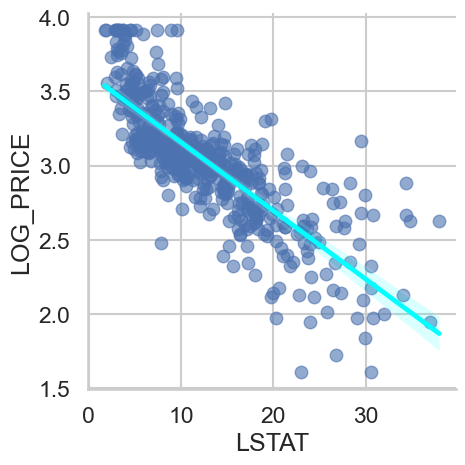

In [116]:
transformed_data=features
transformed_data['LOG_PRICE']= y_log

sns.lmplot(x='LSTAT', y='LOG_PRICE', data=transformed_data, 
           scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

In [ ]:
# besed on the result we can change to get more accurate results

## Regression using log prices

In [117]:
prices = np.log(data['PRICE']) #use log prices
features = data.drop('PRICE',axis=1)

X_train, X_test,y_train,y_test=train_test_split(features, prices,
                                                test_size=0.2, random_state=10)

regr=LinearRegression() 
regr.fit(X_train, y_train) 

print('Trianing data r-squared:', regr.score(X_train,y_train))
print('Test data r-squared:', regr.score(X_test,y_test))

print('Intercept',regr.intercept_)
#print out the values of all coef
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

Trianing data r-squared: 0.7930234826697584
Test data r-squared: 0.7446922306260733
Intercept 4.059943871775192


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In total, Reducing the skew in our distribution of the target value allowed us to improve our distribution of target 
As a result, we have a higher r-squared and better fit

In order to figure out how much more people are willing to pay to be close to the river according to

this model, what we have to do is reverse the log transformation

In [ ]:
# "Charles River Property Premium"

In [118]:
#through numpy, "np.e" will give us access to this irrational number and with ** we can raise e to the power of 0.080331
np.e**0.080331

1.0836456950439142

In [ ]:
# people are willing to pay approximately 1084 and dollars more to live close to the river.

## P-values & Evaluating Coefficients

In [ ]:
#we will be able to use this Python Statsmodels module to pull up detailed statistics that we

# can't easily get with scikit-learn

In [121]:
import statsmodels.api as sm

In [125]:
X_incl_const = sm.add_constant(X_train)

# Ordinary Least Square
model =sm.OLS(y_train, X_incl_const) # OLS gives us a linear regression model which we're storing here
results =model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for Multicollinearity

$$ TAX = \alpha_0 + \alpha_1 RM +  \alpha_2 NOX +...+ \alpha_{12}LSTAT $$

$$ VIF _{TAX}= \frac{1} {(1 - R_{TAX} ^2)} $$

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [134]:
variance_inflation_factor(exog=X_incl_const,exog_idx=1)

1.714525044393249

In [ ]:
# 1.7 -> is the VIF for the crime feature -> exog_idx=1

In [136]:
len(X_incl_const.columns)

14

In [137]:
X_incl_const.shape

(404, 14)

In [153]:
# as a challenge, can you write a for loop that prints out all the variance inflation factors on all the features?

for i in range(X_incl_const.shape[1]):  # the range would be the number of columns in the dataframe
    print(variance_inflation_factor(exog=X_incl_const,exog_idx=i))

597.5487126763895
1.714525044393249
2.3328224265597597
3.943448822674636
1.0788133385000576
4.410320817897635
1.8404053075678573
3.3267660823099394
4.222923410477865
7.314299817005058
8.508856493040817
1.8399116326514058
1.338671325536472
2.812544292793036


In [146]:
vif=[] #empthy list

for i in range(X_incl_const.shape[1]):  
    vif.append(variance_inflation_factor(exog=X_incl_const,exog_idx=i))
print(vif)

[597.5487126763895, 1.714525044393249, 2.3328224265597597, 3.943448822674636, 1.0788133385000576, 4.410320817897635, 1.8404053075678573, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.338671325536472, 2.812544292793036]


In [149]:
vif=[variance_inflation_factor(exog=X_incl_const,
                               exog_idx=i)for i in range(X_incl_const.shape[1])]


# put them in a dictionary
pd.DataFrame({'coef_name':X_incl_const.columns,
             'vif':np.around(vif,2)})

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

VIF>10 could be problematic

##  Model Simplification & Baysian Information Criteria(BIC)

In [ ]:
# BIC --> measure the complexity
# lower value is better

In [ ]:
# let's compare a model that includes the industry feature and the model that excludes the industry feature.

In [158]:
# Original model with log prices and all features

X_incl_const = sm.add_constant(X_train)

# Ordinary Least Square
model =sm.OLS(y_train, X_incl_const) # OLS gives us a linear regression model which we're storing here
results =model.fit()


org_coef = pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})

# challenge, find and check the Baysian information criterion value for this regression as well as the r-squared?

print('BIC is:',results.bic)
print('R_sqaured is:',results.rsquared)


BIC is: -139.7499776947892
R_sqaured is: 0.7930234826697584


In [159]:
# Reduced model #1 excluding INDUS

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis=1)

# Ordinary Least Square
model =sm.OLS(y_train, X_incl_const) # OLS gives us a linear regression model which we're storing here
results =model.fit()


coef_minus_indus = pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})


print('BIC is:',results.bic)
print('R_sqaured is:',results.rsquared)

BIC is: -145.14508855591163
R_sqaured is: 0.7927126289415163


In [161]:
# Reduced model #2 excluding INDUS and AGE

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis=1)

# Ordinary Least Square
model =sm.OLS(y_train, X_incl_const) # OLS gives us a linear regression model which we're storing here
results =model.fit()


reduced_coef = pd.DataFrame({'coef':results.params,'p-values':round(results.pvalues,3)})


print('BIC is:',results.bic)
print('R_sqaured is:',results.rsquared)

BIC is: -149.49934294224678
R_sqaured is: 0.7918657661852815


So according to the results, removing both INDUS and AGE is actually a beneficial thing.

We can probably safely drop these two features simplifying our model without incurring too much of a

cost in terms of lost information and a worse fit.

In [163]:
frames =[org_coef,coef_minus_indus, reduced_coef]
pd.concat(frames, axis=1)

coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals and Residual plots

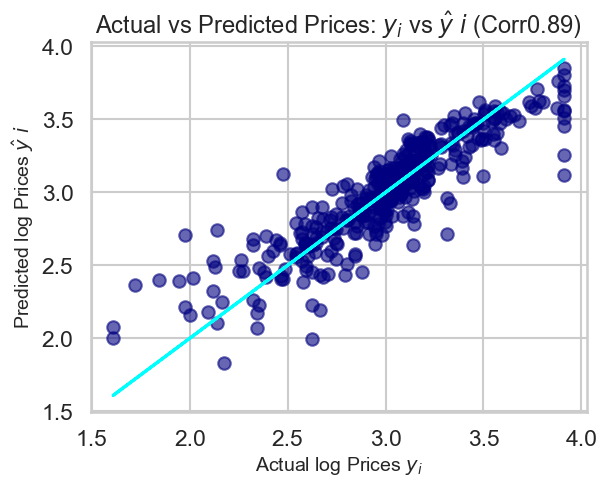

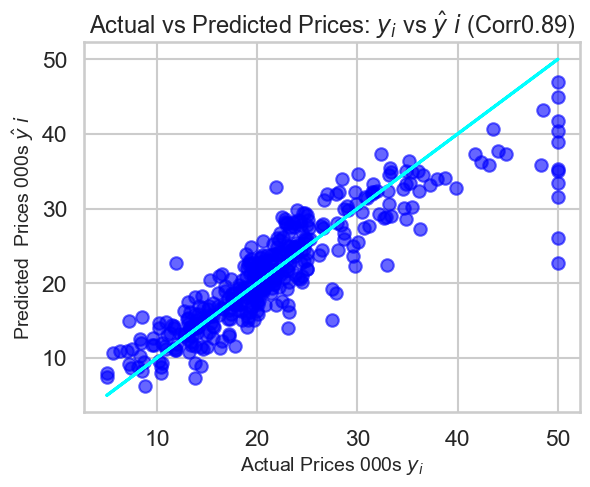

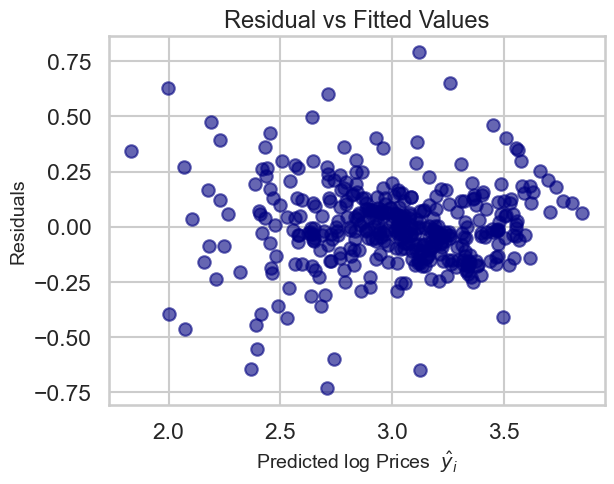

In [200]:
# Modified model: transformed (using log prices) & simplified (dropping two features)

prices = np.log(data['PRICE'])  #use log prices
features = data.drop(['PRICE','INDUS','AGE'],axis=1)

X_train, X_test,y_train,y_test=train_test_split(features, prices,
                                                test_size=0.2, random_state=10)

#Using Statsmodel 

X_incl_const = sm.add_constant(X_train)
model =sm.OLS(y_train, X_incl_const) 
results =model.fit()

# Residuals
# residuals= y_train - results.fittedvalues  -->  y-tain(actual values)do it manually or by attribute from residuals in below code
# results.resid


# Graph of Actual vs. Predicted Prices

corr= round(y_train.corr(results.fittedvalues),2)
plt.scatter(x= y_train, y= results.fittedvalues, c='navy', alpha=0.6) #  x= y-tain(actual values) y= results.fittedvalues(fitted values)
plt.plot(y_train, y_train, color='cyan') #add predicted line

plt.xlabel('Actual log Prices $y _i$',fontsize=14)
plt.ylabel('Predicted log Prices $\hat y_ i$',fontsize=14)
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_ i$ (Corr{corr})',fontsize=17)

plt.show()


# Actual Prices
plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)
plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual Prices 000s $y _i$',fontsize=14)
plt.ylabel('Predicted  Prices 000s $\hat y_ i$',fontsize=14)
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_ i$ (Corr{corr})',fontsize=17)

plt.show()


#from the above charts, we can not see the residual explicitly. we can only see how far the residuals are from the cyan line.
#but our residual are not on one of the axes




# Residual vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)


plt.xlabel('Predicted log Prices  $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residual vs Fitted Values',fontsize=17)

plt.show()


# Mean Squared Error & R-Squared
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)



In [ ]:
# the residuals look random for the most part, and the residuals are actually centered around zero
# they are fairly symmetric. not systematiclly high or low.

# Now let's check the normality
# Since we want our residuals to be normally distributed.

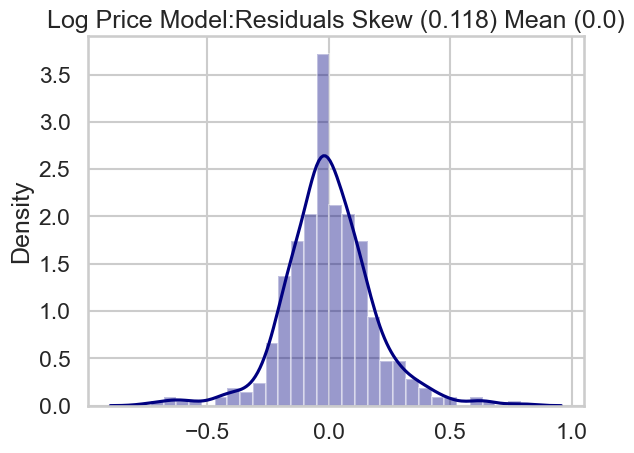

In [196]:
# Distribution of residuals (log prices) -checking for normality mean=0 skew=0
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)


# plot

sns.distplot(results.resid, color='navy')
plt.title(f'Log Price Model:Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

# Residuals are symmytrical, but in contrast to normal distribution has longer tails bigger peak ->more values in left and right

In [ ]:
#Challenge: Using the original model with all the features and normal prices generate:
# plot actual vs predicted prices (ncl. correlation)
# plot of residuals vs predicted prices
#plot of distribution of residuals(incl Skew)
# Analyse the results

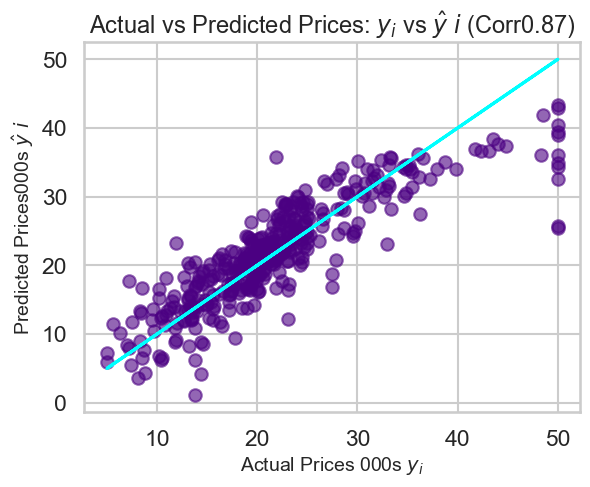

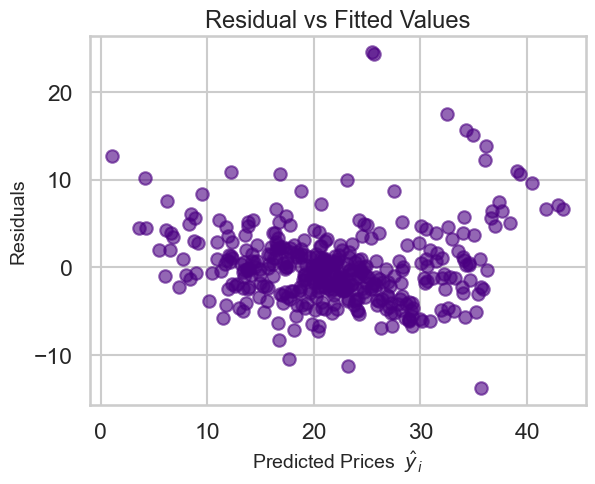

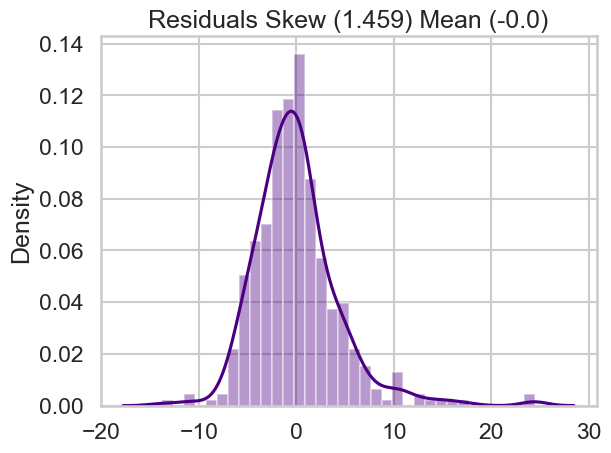

In [201]:
# Original model: normal prices & all features
prices = (data['PRICE']) 
features = data.drop(['PRICE'],axis=1)

X_train, X_test,y_train,y_test=train_test_split(features, prices,
                                                test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model =sm.OLS(y_train, X_incl_const) 
results =model.fit()


# Graph of Actual vs. Predicted Prices

corr= round(y_train.corr(results.fittedvalues),2)
plt.scatter(x= y_train, y= results.fittedvalues, c='indigo', alpha=0.6) #  x= y-tain(actual values) y= results.fittedvalues(fitted values)
plt.plot(y_train, y_train, color='cyan') #add predicted line

plt.xlabel('Actual Prices 000s $y _i$',fontsize=14)
plt.ylabel('Predicted Prices000s $\hat y_ i$',fontsize=14)
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_ i$ (Corr{corr})',fontsize=17)

plt.show()


# Residual vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)


plt.xlabel('Predicted Prices  $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residual vs Fitted Values',fontsize=17)

plt.show()


# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()


# Mean Squared Error & R-Squared
full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

In [ ]:
# in second chart, we can see a pattern therefore it seems that the 
# the log transformation for the target values that we did was indeed appropriate.

In [ ]:
# for A distribution of residuals, we've got 1.5 approximately.
# that's not close to a normal distribution makes things much more difficult when it comes to making predictions

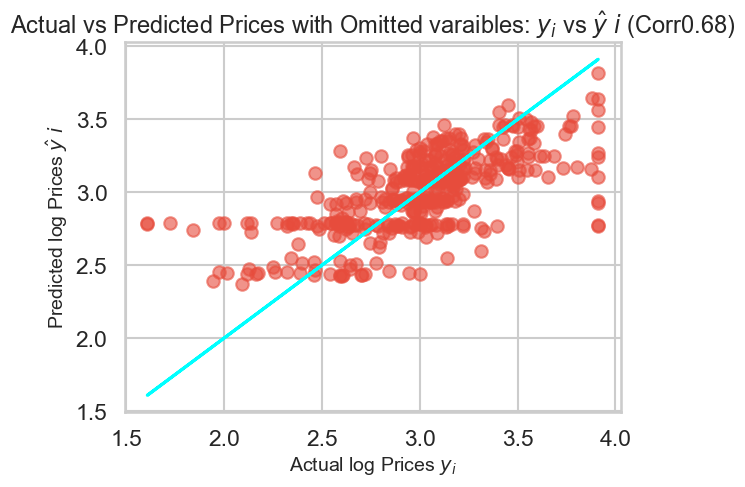

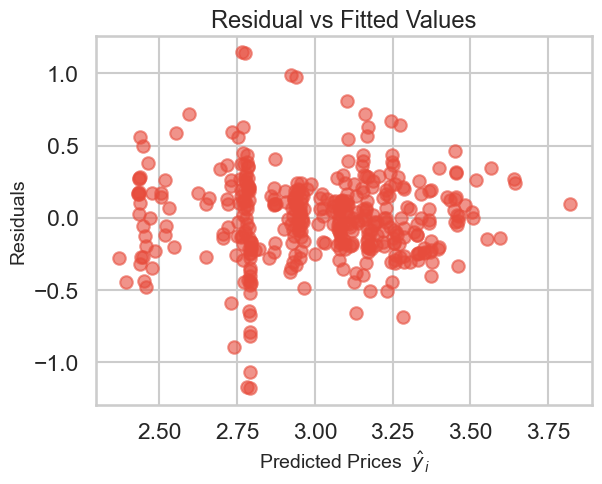

In [202]:
# Model Ommiting key features using log prices
prices = np.log(data['PRICE']) 
features = data.drop(['PRICE','INDUS','AGE','LSTAT','RM','NOX','CRIM'],axis=1)

X_train, X_test,y_train,y_test=train_test_split(features, prices,
                                                test_size=0.2, random_state=10)

X_incl_const = sm.add_constant(X_train)
model =sm.OLS(y_train, X_incl_const) 
results =model.fit()


# Graph of Actual vs. Predicted Prices

corr= round(y_train.corr(results.fittedvalues),2)
plt.scatter(x= y_train, y= results.fittedvalues, c='#e74c3c', alpha=0.6) #  x= y-tain(actual values) y= results.fittedvalues(fitted values)
plt.plot(y_train, y_train, color='cyan') #add predicted line

plt.xlabel('Actual log Prices $y _i$',fontsize=14)
plt.ylabel('Predicted log Prices $\hat y_ i$',fontsize=14)
plt.title(f'Actual vs Predicted Prices with Omitted varaibles: $y _i$ vs $\hat y_ i$ (Corr{corr})',fontsize=17)

plt.show()


# Residual vs Predicted values

plt.scatter(x=results.fittedvalues, y=results.resid, c='#e74c3c', alpha=0.6)


plt.xlabel('Predicted Prices  $\hat y _i$',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residual vs Fitted Values',fontsize=17)

plt.show()

# Mean Squared Error & R-Squared
omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

you can see several banding in the charts
what we see in this chart here are clusters . very clear pattern
telling us that there is some missing information in our model and his information has somehow found its way into the residuals.

My hypothesis as to why we see these properties lining up like this is(first chart pattern for 50,000 home) because there's something maybe missing from our model, maybe there is some feature that these are homes all have in common or there
was something in the way that the data was collected or there is some sort of interaction between a
feature of these homes that we're not capturing in our model.


In [ ]:
# Now put all of them side by side

In [207]:
pd.DataFrame({'R_squared':[reduced_log_rsquared,full_normal_rsquared,omitted_var_rsquared],
              'MSE':[reduced_log_mse,full_normal_mse,omitted_var_mse],
             'RMSE':np.sqrt([reduced_log_mse,full_normal_mse,omitted_var_mse])},
            index=['Reduced Log Model','Full Normal Price Model','Omitted Var Model'])

R_squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Omitted Var Model            0.460   0.090  0.300000

In [ ]:
# lower of MSE indicate a better fit. and MSE of zero indicate perfect fit.

In [ ]:
# RMSE -> Represent one std of the differences between actual & predicted values -> np.sqrt

In [216]:
#Challenge-> Our estimate for a house price is $30,000. calculate the upper and lower bound
#for 95% prediction interval using the reduced log model

print('1.s.d in log prices is',np.sqrt(reduced_log_mse))
print('2.s.d in log prices is',2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound for a 95% prediction is',upper_bound)
print('The upper bound for a normal prices is $',np.e**upper_bound *1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound for a 95% prediction is',lower_bound)
print('The lower bound for a normal prices is $',np.e**lower_bound *1000)

1.s.d in log prices is 0.18708286933869708
2.s.d in log prices is 0.37416573867739417
The upper bound for a 95% prediction is 3.7753631203395495
The upper bound for a normal prices is $ 43613.34233239937
The lower bound for a 95% prediction is 3.0270316429847615
The lower bound for a normal prices is $ 20635.886906824155


we often look towards the root mean squared error when we're interested in the predictive power of our models, and to some extent we can use the root mean squared error to also compare the models.


if the main purpose of the model is prediction. And this is a big contrast to something like R-Squared because R-Squared says absolutely nothing about the predictive power of the model or the prediction error.

R-Squared say how much y^ explained by explanatory variables.

In [219]:
val.get_dollar_estimate(8,15,False)

The estimated property value is: 755000.0.
At 95% the confidence the valuation range is
USD:519000.0 at the lower end to 1099000.0 at the high end.
